# Time Series

Date and time are two variables that unlock an enormous amount of additional quality and capability in datasets, but the format that Python uses to record data can be slightly differently to how we are used to thinking about time.

In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns

https://www.w3schools.com/python/gloss_python_date.asp
https://www.geeksforgeeks.org/python-working-with-date-and-time-using-pandas/
https://pandas.pydata.org/docs/user_guide/timeseries.html

You can generate dates or date-times with the `date_range` and `to_datetime` functions.

In [2]:
dti = pd.to_datetime(
    ["1/1/2018", np.datetime64("2018-01-01"), dt.datetime(2018, 1, 1)]
)
dti

DatetimeIndex(['2018-01-01', '2018-01-01', '2018-01-01'], dtype='datetime64[ns]', freq=None)

In [3]:
dti = pd.date_range("2018-01-01", periods=3, freq="H")
dti

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00'],
              dtype='datetime64[ns]', freq='H')

## Using a dataset

In [4]:
# this is the CO2 data collected by the NOAA at Mauna Loa observatory in Hawai'i.
mlco = pd.read_csv("https://datahub.io/core/co2-ppm/r/co2-mm-mlo.csv")
mlco

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days
0,1958-03-01,1958.208,315.71,315.71,314.62,-1
1,1958-04-01,1958.292,317.45,317.45,315.29,-1
2,1958-05-01,1958.375,317.50,317.50,314.71,-1
3,1958-06-01,1958.458,-99.99,317.10,314.85,-1
4,1958-07-01,1958.542,315.86,315.86,314.98,-1
...,...,...,...,...,...,...
722,2018-05-01,2018.375,411.24,411.24,407.91,24
723,2018-06-01,2018.458,410.79,410.79,408.49,29
724,2018-07-01,2018.542,408.71,408.71,408.32,27
725,2018-08-01,2018.625,406.99,406.99,408.90,30


Python won't automatically detect the Date column as a date-formatted data, which can be displayed when the `dtype` below displays 'object'.

In [5]:
mlco['Date']

0      1958-03-01
1      1958-04-01
2      1958-05-01
3      1958-06-01
4      1958-07-01
          ...    
722    2018-05-01
723    2018-06-01
724    2018-07-01
725    2018-08-01
726    2018-09-01
Name: Date, Length: 727, dtype: object

Pandas has the ability to change this with the `to_datetime` function, which can accept an entire column as a parameter.

In [6]:
mlco['datetime'] = pd.to_datetime(mlco['Date'])
mlco

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days,datetime
0,1958-03-01,1958.208,315.71,315.71,314.62,-1,1958-03-01
1,1958-04-01,1958.292,317.45,317.45,315.29,-1,1958-04-01
2,1958-05-01,1958.375,317.50,317.50,314.71,-1,1958-05-01
3,1958-06-01,1958.458,-99.99,317.10,314.85,-1,1958-06-01
4,1958-07-01,1958.542,315.86,315.86,314.98,-1,1958-07-01
...,...,...,...,...,...,...,...
722,2018-05-01,2018.375,411.24,411.24,407.91,24,2018-05-01
723,2018-06-01,2018.458,410.79,410.79,408.49,29,2018-06-01
724,2018-07-01,2018.542,408.71,408.71,408.32,27,2018-07-01
725,2018-08-01,2018.625,406.99,406.99,408.90,30,2018-08-01


We can then use seaborn to plot multiple columns on the same chart.

<AxesSubplot:xlabel='datetime', ylabel='Interpolated'>

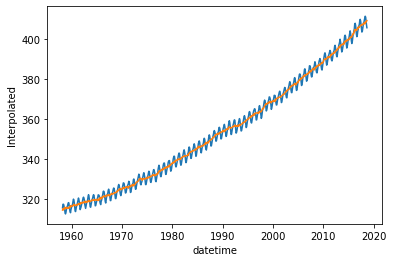

In [7]:
sns.lineplot(data=mlco,x="datetime",y="Interpolated")
sns.lineplot(data=mlco,x="datetime",y="Trend")

These libraries work just as well with larger, less complete or messier datasets, and pandas contains a number of tools for cleaning data. Without the `skiprows` parameter, the command below will return a parser error. In this case, there are some header lines and comments before the dataset begins. The dataset in use here is the hourly weather data from Knock Airport.

*Note: there will be warning once this command runs without the low_memory parameter, it also showed up in Brian's demonstration and just concerned the mixed datatypes in some columns.*

In [8]:
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv",skiprows=23, low_memory=False)
df

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230125,31-oct-2022 20:00,0,0.0,0,8.3,0,8.2,8.2,10.8,99,...,2,4,2,200,,,0.0,,0,8
230126,31-oct-2022 21:00,0,0.1,0,7.9,0,7.9,7.9,10.6,100,...,2,5,2,200,,,0.0,,0,8
230127,31-oct-2022 22:00,0,0.0,0,7.5,0,7.4,7.4,10.2,99,...,2,3,2,200,,,0.0,,0,8
230128,31-oct-2022 23:00,0,0.1,0,7.1,0,7.1,7.0,10.1,100,...,2,5,2,210,,,0.0,,0,8


In [ ]:
df['datetime'] = pd.to_datetime(df['date'])
df